In [1]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
import tensorflow as tf
from matplotlib import pyplot as plt
import torch.nn as nn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from collections import OrderedDict
import torch.optim as optim

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA

from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import r2_score


In [2]:
EV_Title = pd.DataFrame(pd.read_csv('Electric_Vehicle_Title_and_Registration_Activity.csv'))
EV_Title

,Clean Alternative Fuel Vehicle Type,VIN (1-10),Model Year,Make,Model,New or Used Vehicle,Sale Price,DOL Transaction Date,Transaction Type,Transaction Year,...,2019 HB 2042 Clean Alternative Fuel Vehicle (CAFV) Eligibility,Meets 2019 HB 2042 Electric Range Requirement,Meets 2019 HB 2042 Sale Date Requirement,Meets 2019 HB 2042 Sale Price/Value Requirement,Odometer Reading,Odometer Code,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid,2020 Census Tract,Electric Utility
0,Battery Electric Vehicle (BEV),7FCTGAAA8N,2022,RIVIAN,R1T,New,0,August 16 2022,Original Registration,2022,...,ERROR: No battery range; TRANSACTION NOT ELIGI...,False,False,False,0,Odometer reading is not collected at time of r...,No,No,5.303300e+10,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,Battery Electric Vehicle (BEV),5YJ3E1EBXN,2022,TESLA,Model 3,New,70440,October 11 2022,Original Title,2022,...,ERROR: No battery range; TRANSACTION NOT ELIGI...,False,True,False,15,Actual Mileage,Not Applicable,Not Applicable,5.303300e+10,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
2,Battery Electric Vehicle (BEV),5YJ3E1EBXN,2022,TESLA,Model 3,New,0,October 11 2022,Original Registration,2022,...,ERROR: No battery range; TRANSACTION NOT ELIGI...,False,False,False,0,Odometer reading is not collected at time of r...,No,No,5.303300e+10,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
3,Battery Electric Vehicle (BEV),1G1FX6S07H,2017,CHEVROLET,Bolt EV,Used,21219,October 15 2019,Original Title,2019,...,Clean Alternative Fuel Vehicle,True,True,True,43515,Actual Mileage,Not Applicable,Not Applicable,5.304197e+10,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Battery Electric Vehicle (BEV),1G1FX6S07H,2017,CHEVROLET,Bolt EV,Used,0,October 15 2019,Original Registration,2019,...,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,0,Odometer reading is not collected at time of r...,No,No,5.304197e+10,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633869,Plug-in Hybrid Electric Vehicle (PHEV),SALWV2RY9L,2020,LAND ROVER,Range Rover Sport,New,0,April 13 2020,Original Registration,2020,...,VEHICLE MODEL NOT ELIGIBLE: Low battery range;...,False,False,False,0,Odometer reading is not collected at time of r...,No,No,5.303303e+10,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
633870,Battery Electric Vehicle (BEV),5YJSA1E2XL,2020,TESLA,Model S,New,89790,January 16 2020,Original Title,2020,...,TRANSACTION NOT ELIGIBLE: Sale price too high,True,True,False,50,Actual Mileage,Not Applicable,Not Applicable,5.303303e+10,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
633871,Battery Electric Vehicle (BEV),5YJSA1E2XL,2020,TESLA,Model S,New,0,January 16 2020,Original Registration,2020,...,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,0,Odometer reading is not collected at time of r...,No,No,5.303303e+10,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
633872,Battery Electric Vehicle (BEV),5YJSA1E2XL,2020,TESLA,Model S,Used,0,November 30 2020,Registration Renewal,2020,...,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,0,Odometer reading is not collected at time of r...,Yes,No,5.303303e+10,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [3]:
features = ['VIN (1-10)','Transaction Type', 'Transaction Year', 'Postal Code']
EV_Title = EV_Title[features]
EV_Title.head()

,VIN (1-10),Transaction Type,Transaction Year,Postal Code
0,7FCTGAAA8N,Original Registration,2022,98107.0
1,5YJ3E1EBXN,Original Title,2022,98107.0
2,5YJ3E1EBXN,Original Registration,2022,98107.0
3,1G1FX6S07H,Original Title,2019,98532.0
4,1G1FX6S07H,Original Registration,2019,98532.0


In [4]:
EV_Title = EV_Title[EV_Title['Transaction Type'] == 'Original Title']
EV_Title

,VIN (1-10),Transaction Type,Transaction Year,Postal Code
1,5YJ3E1EBXN,Original Title,2022,98107.0
3,1G1FX6S07H,Original Title,2019,98532.0
7,7SAYGDEF9N,Original Title,2022,98033.0
10,JTDKN3DP5D,Original Title,2016,98329.0
11,7SAYGDEF9N,Original Title,2022,98034.0
...,...,...,...,...
633859,7SAYGDEE2N,Original Title,2022,98040.0
633862,1G1RA6E44D,Original Title,2014,98528.0
633863,1G1RD6S5XH,Original Title,2019,98106.0
633868,KM8K53AG0M,Original Title,2021,98444.0


In [5]:
EV_Title.drop_duplicates(subset = "VIN (1-10)",keep = False, inplace= True) ##dropping duplicate vins
EV_Title

,VIN (1-10),Transaction Type,Transaction Year,Postal Code
777,WBA7W4C07L,Original Title,2022,98166.0
950,WVGKMPE24N,Original Title,2022,98502.0
2079,50EA1DAA5N,Original Title,2022,99036.0
2264,WA1VCBGE5N,Original Title,2022,98033.0
2308,5YJRE1A33B,Original Title,2011,98005.0
...,...,...,...,...
630896,KMHCX5LD1L,Original Title,2020,98382.0
631084,WA1J2BFZ9N,Original Title,2022,98516.0
631417,KNDCM3LD7L,Original Title,2021,98115.0
632255,SADHC2S12L,Original Title,2019,98112.0


In [6]:
features = ['Transaction Year']
EV_Title_Year = EV_Title[features]
EV_Title_Year

,Transaction Year
777,2022
950,2022
2079,2022
2264,2022
2308,2011
...,...
630896,2020
631084,2022
631417,2021
632255,2019


In [7]:
#sns.scatterplot(EV_Title_Year)

In [8]:
#np.amin(EV_Title_Year)

In [9]:
def findingyears(year):
    x=np.where(EV_Title_Year == year)
    return x

In [10]:
arr = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,] 
arr1 = []

for i in range(len(arr)):
    x = findingyears(arr[i])
    x = np.array(x)
    arr1.append(x.size/2)
#EV_Title_Year.insert(loc = 2, column = "Number of EV", value = arr1)
arr1

[3.0,
 13.0,
 14.0,
 19.0,
 17.0,
 32.0,
 38.0,
 64.0,
 100.0,
 147.0,
 174.0,
 300.0,
 526.0]

In [11]:
zipped = list(zip(arr, arr1))
df = pd.DataFrame(zipped, columns=['Year', 'Total_Sold'])
print(sum(arr1))
df

1447.0


,Year,Total_Sold
0,2010,3.0
1,2011,13.0
2,2012,14.0
3,2013,19.0
4,2014,17.0
5,2015,32.0
6,2016,38.0
7,2017,64.0
8,2018,100.0
9,2019,147.0


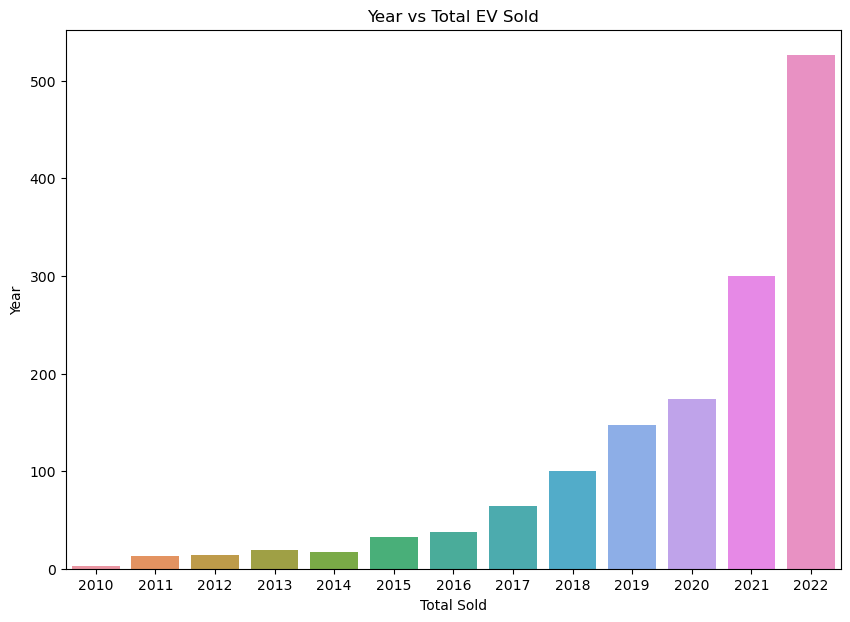

In [12]:
fig=plt.figure(figsize = (10, 7))
sns.barplot(x="Year", y="Total_Sold", data=df)
plt.title('Year vs Total EV Sold')
plt.xlabel('Total Sold')
plt.ylabel('Year')
plt.show()
fig.savefig('Year vs Total Sold.jpg', bbox_inches='tight', dpi=150)

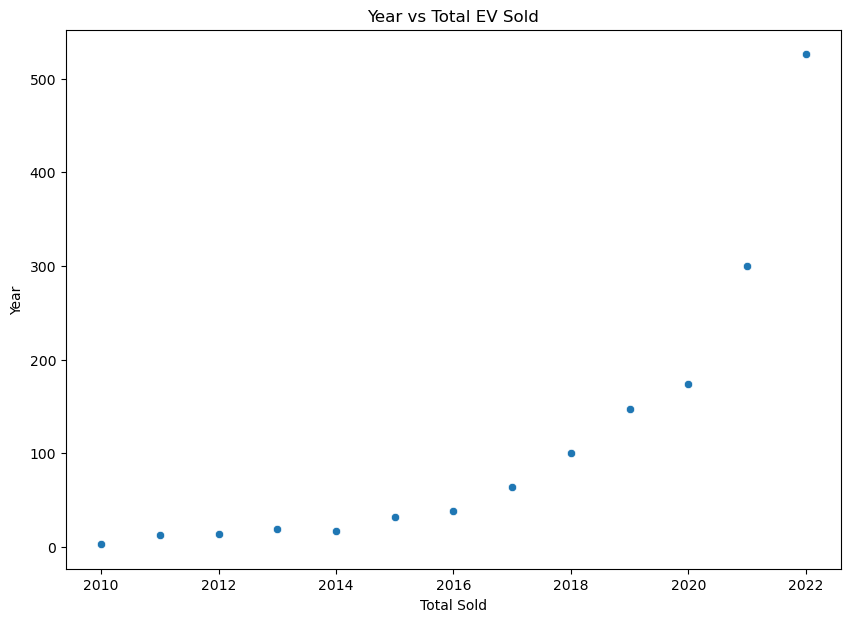

In [13]:
fig=plt.figure(figsize = (10, 7))
sns.scatterplot(x="Year", y="Total_Sold", data=df)
plt.title('Year vs Total EV Sold')
plt.xlabel('Total Sold')
plt.ylabel('Year')
plt.show()

In [14]:
X=np.array(df["Year"].values)
y=np.array(df["Total_Sold"].values)

X=X.reshape(-1,1)
y=y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train) 
xtest = sc_x.transform(X_test)
  
print (xtrain[0:10, :])
print(X.shape)
print(y.shape)

[[-0.84279538]
 [ 0.72654774]
 [-1.10435257]
 [ 0.46499055]
 [ 0.98810493]
 [-0.58123819]
 [-1.36590976]
 [-0.05812382]
 [ 1.77277649]]
(13, 1)
(13, 1)


In [15]:
#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(random_state = 0)
#classifier.fit(X_train, y_train)
from sklearn import datasets, linear_model, metrics
classifier = linear_model.LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression()

In [16]:
classifier.predict(X_train)

array([[ -4.47212838],
       [193.78631757],
       [-37.5152027 ],
       [160.74324324],
       [226.82939189],
       [ 28.57094595],
       [-70.55827703],
       [ 94.65709459],
       [325.95861486]])

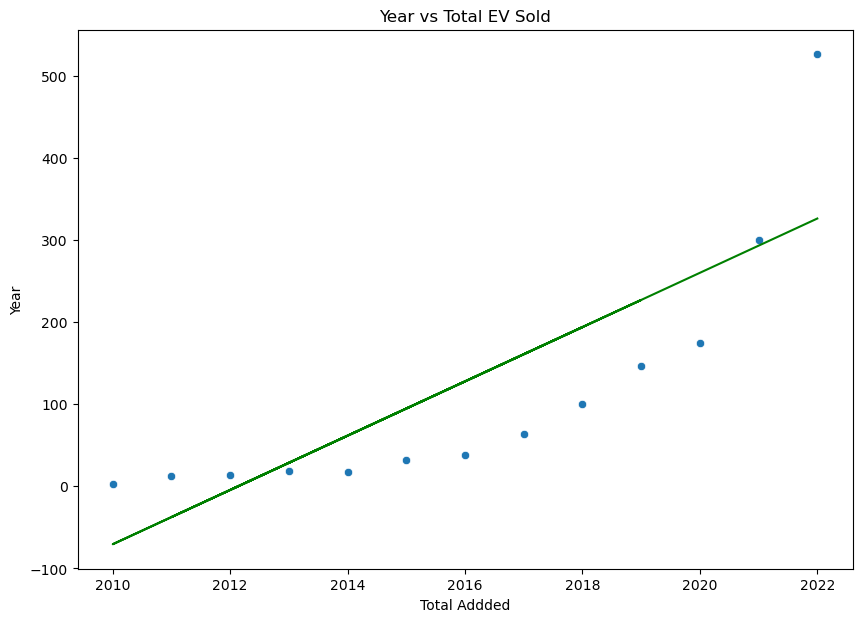

In [17]:
x=X_train
y=y_train
n = np.size(x)

x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean

y_pred = classifier.predict(X_train)
    
fig=plt.figure(figsize = (10, 7))
plt.title('Year vs Total EV Sold')
sns.scatterplot(x="Year", y="Total_Sold", data=df)
plt.plot(x, y_pred, color = 'green')
plt.xlabel('Total Addded')
plt.ylabel('Year')
fig.savefig('Year vs Total Sold Prediction Line.jpg', bbox_inches='tight', dpi=150)

In [21]:
print('Variance score: {}'.format(classifier.score(X_test, y_test)))
score = classifier.score(X_test, y_test)
print(f'Linear regression model score: {score:.2f}')

Variance score: 0.6645298661611272
Linear regression model score: 0.66


In [22]:
from sklearn.preprocessing import PolynomialFeatures

# Create a polynomial features transformer
poly_transformer = PolynomialFeatures(degree=4)

# Transform the training and test data using the transformer
X_train_poly = poly_transformer.fit_transform(X_train)
X_test_poly = poly_transformer.transform(X_test)

# Create a linear regression model
poly_model = LinearRegression()

# Fit the model to the transformed data
poly_model.fit(X_train_poly, y_train)

# Evaluate the model on the transformed test data
score = poly_model.score(X_test_poly, y_test)
print(f'Polynomial regression model score: {score:.2f}')
y_pred = poly_model.predict(X_train_poly)
y_pred

Polynomial regression model score: 0.81


array([[ 21.38785076],
       [ 97.65315914],
       [ 14.92621994],
       [ 57.41131973],
       [159.70409775],
       [ 21.95735073],
       [ -2.02039242],
       [ 23.82569313],
       [523.15471172]])

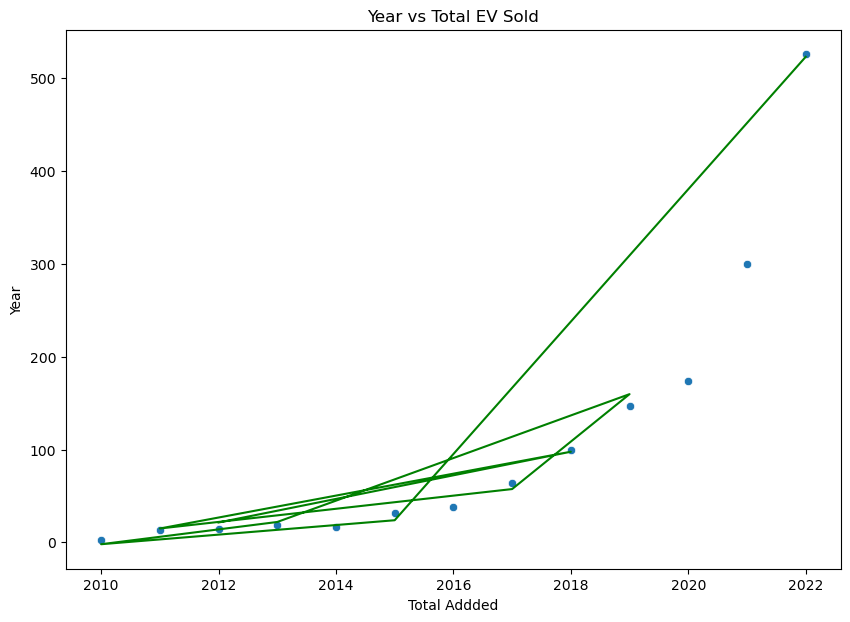

In [23]:
x=X_train
y=y_train
n = np.size(x)
    
fig=plt.figure(figsize = (10, 7))
plt.title('Year vs Total EV Sold')
sns.scatterplot(x="Year", y="Total_Sold", data=df)
plt.plot(x, y_pred, color = 'green')
plt.xlabel('Total Addded')
plt.ylabel('Year')
fig.savefig('Year vs Total Sold Polynomal Prediction Line.jpg', bbox_inches='tight', dpi=150)

[[ 718.91955566]
 [ 959.76656437]
 [1250.37093544]
 [1595.41472912]
 [1999.58687019]
 [2467.58313847]
 [3004.10618877]
 [3613.86552429]
 [4301.57751942]
 [5071.96540546]
 [5929.75927925]]


<bound method NDFrame.head of     Year  Total_Sold
0   2010         3.0
1   2011        13.0
2   2012        14.0
3   2013        19.0
4   2014        17.0
5   2015        32.0
6   2016        38.0
7   2017        64.0
8   2018       100.0
9   2019       147.0
10  2020       174.0
11  2021       300.0
12  2022       526.0>

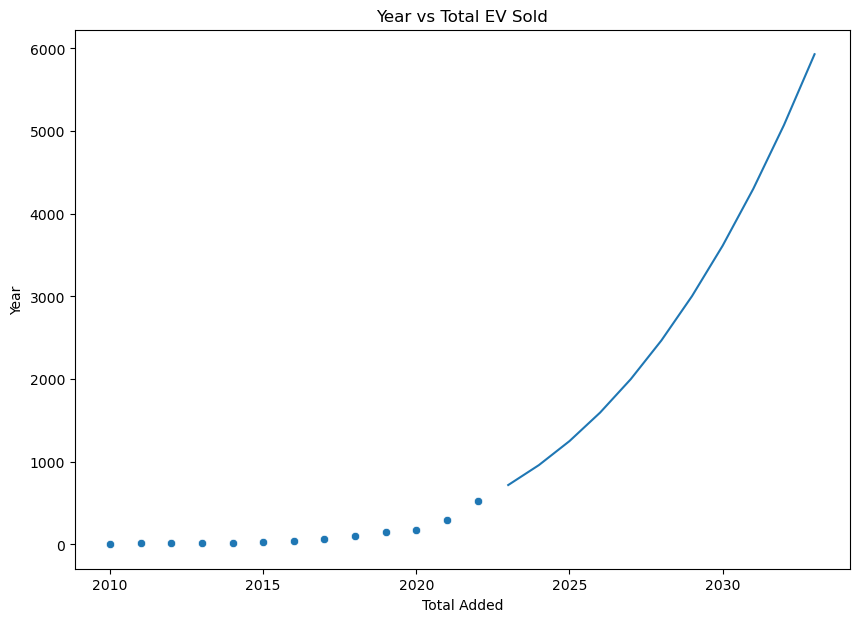

In [24]:
# Suppose the year is 2020
year = 2020


# You haven't provided the values of X_train and y_train, so I'm going to
# use the years list as the x values and an array of zeros as the y values
# for this example.

x = [2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033]
y = np.zeros(len(x))

# You also haven't provided the classifier object, so I'm going to use a
# dummy object for this example.

# Now we can use the x and y values to plot the data

# Reshape the x array to be a 2D array of size (n, 1) where n is the
# number of elements in the array
x = np.array(x).reshape(-1, 1)

# Use the classifier object to predict the y values for the x values

X_new = [[x]]

# Transform the features
X_new = [[year] for year in x]
X_new = np.array(x).reshape(-1, 1)

X_new_poly = poly_transformer.fit_transform(X_new)

# Make a prediction using the model
prediction = poly_model.predict(X_new_poly)

# Create a figure object with a specified size
fig = plt.figure(figsize=(10, 7))

# Add a title to the plot
plt.title('Year vs Total EV Sold')

# Plot the x and y values as a scatterplot
sns.scatterplot(x="Year", y="Total_Sold", data=df)

# Plot the predicted y values against the x values as a scatter plot
plt.plot(x, prediction)

# Label the x and y axes
plt.xlabel('Total Added')
plt.ylabel('Year')
fig.savefig('Year vs Total Poly Sold Predictions.jpg', bbox_inches='tight', dpi=150)
print(prediction)
df.head

In [25]:
zipped = zip(x,prediction)
df_predicted = pd.DataFrame(zipped, columns=['Year', 'Total_Sold'])

# use the astype method to convert the data type of the values
df_predicted["Year"] = df_predicted["Year"].astype(int)
df_predicted["Total_Sold"] = df_predicted["Total_Sold"].astype(int)

# display the modified dataframe
print(df_predicted)

    Year  Total_Sold
0   2023         718
1   2024         959
2   2025        1250
3   2026        1595
4   2027        1999
5   2028        2467
6   2029        3004
7   2030        3613
8   2031        4301
9   2032        5071
10  2033        5929


In [26]:
x=X_train
y=y_train
n = np.size(x)

# Fit the data(train the model)
classifier.fit(x, y)
  
# Predict
y_predicted = classifier.predict(x)
  
# model evaluation
mse=mean_squared_error(y,y_predicted)
  
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
  
# printing values
print('Slope:' ,classifier.coef_)
print('Intercept:', classifier.intercept_)
print('MSE:',mse)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[33.04307432]]
Intercept: [-66487.13766892]
MSE: 8540.63954579545
Root mean squared error:  92.41558064415031
R2 score:  0.6514087911686


<bound method NDFrame.head of     Year  Total_Sold
0   2010         3.0
1   2011        13.0
2   2012        14.0
3   2013        19.0
4   2014        17.0
5   2015        32.0
6   2016        38.0
7   2017        64.0
8   2018       100.0
9   2019       147.0
10  2020       174.0
11  2021       300.0
12  2022       526.0>

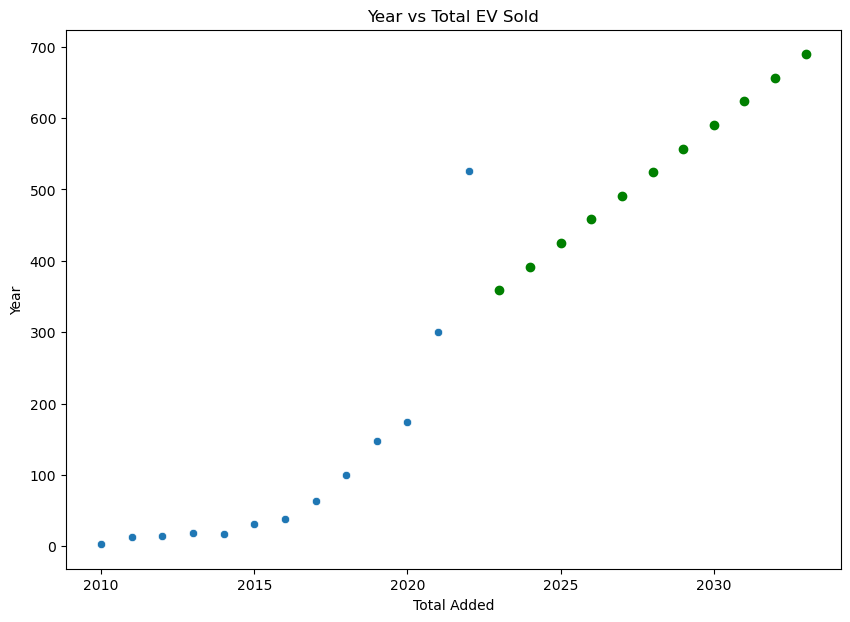

In [27]:
# You haven't provided the values of X_train and y_train, so I'm going to
# use the years list as the x values and an array of zeros as the y values
# for this example.

x = [2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033]
y = np.zeros(len(x))

# You also haven't provided the classifier object, so I'm going to use a
# dummy object for this example.

# Now we can use the x and y values to plot the data

# Reshape the x array to be a 2D array of size (n, 1) where n is the
# number of elements in the array
x = np.array(x).reshape(-1, 1)

# Use the classifier object to predict the y values for the x values
y_pred = classifier.predict(x)

# Create a figure object with a specified size
fig = plt.figure(figsize=(10, 7))

# Add a title to the plot
plt.title('Year vs Total EV Sold')

# Plot the x and y values as a scatterplot
sns.scatterplot(x="Year", y="Total_Sold", data=df)

# Plot the predicted y values against the x values as a scatter plot
plt.scatter(x, y_pred, color='green')

# Label the x and y axes
plt.xlabel('Total Added')
plt.ylabel('Year')
fig.savefig('Year vs Total Sold Predictions.jpg', bbox_inches='tight', dpi=150)
df.head

In [28]:
#df_output = df.append(df_predicted)
df.to_csv('predicted_vehicles.csv')
df

,Year,Total_Sold
0,2010,3.0
1,2011,13.0
2,2012,14.0
3,2013,19.0
4,2014,17.0
5,2015,32.0
6,2016,38.0
7,2017,64.0
8,2018,100.0
9,2019,147.0


In [29]:
import torch as tn

In [30]:
X=np.array(df["Year"].values)
y=np.array(df["Total_Sold"].values)

X=X.reshape(-1,1)
y=y.reshape(-1,1)

In [31]:
print(X.shape)
print(X)

(13, 1)
[[2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]
 [2021]
 [2022]]


In [32]:
print(y.shape)
print(y)

(13, 1)
[[  3.]
 [ 13.]
 [ 14.]
 [ 19.]
 [ 17.]
 [ 32.]
 [ 38.]
 [ 64.]
 [100.]
 [147.]
 [174.]
 [300.]
 [526.]]


In [33]:
import tensorflow as tf
from tensorflow import keras

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Define the model
model = keras.Sequential([
    # Add a dense layer with 11 neurons and an input shape of (1,)
    keras.layers.Dense(11, input_shape=(1,)),
    # Add a sigmoid activation function
    keras.layers.Activation('sigmoid'),
    # Add a dense layer with 1 neuron and a sigmoid activation function
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(), loss='mean_squared_error')

# Fit the model on the data
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 751ms/step - loss: 34780.2578
Epoch 2/10
1/1 [==============================] - 0s 14ms/step - loss: 34779.8242
Epoch 3/10
1/1 [==============================] - 0s 27ms/step - loss: 34779.3906
Epoch 4/10
1/1 [==============================] - 0s 36ms/step - loss: 34778.9570
Epoch 5/10
1/1 [==============================] - 0s 16ms/step - loss: 34778.5352
Epoch 6/10
1/1 [==============================] - 0s 11ms/step - loss: 34778.1016
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 34777.6719
Epoch 8/10
1/1 [==============================] - 0s 15ms/step - loss: 34777.2461
Epoch 9/10
1/1 [==============================] - 0s 14ms/step - loss: 34776.8125
Epoch 10/10
1/1 [==============================] - 0s 8ms/step - loss: 34776.3945


In [34]:
# Evaluate the model on the testing data
score = model.evaluate(X_test, y_test, verbose=0)
score

30335.552734375

In [35]:
model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False), loss='mean_squared_error', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 542ms/step - loss: 34775.9648 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 34703.1211 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 27ms/step - loss: 34702.8906 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 34702.7109 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 34702.5781 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 34702.4688 - accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 34702.3867 - accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 14ms/step - loss: 34702.3086 - accuracy: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 34702.2422 - accuracy: 0.0000e+00
Epoch 10/10
1/1 [==============================] - 0s 7ms/st

In [36]:
# Evaluate the model on the testing data
score = model.evaluate(X_test, y_test, verbose=0)
score

[30239.654296875, 0.0]

In [37]:
# Compile the model
model.compile(optimizer=tf.optimizers.RMSprop(learning_rate=0.01, rho=0.9), loss='mean_squared_error', metrics=['accuracy'])

# Fit the model on the data
model.fit(X_train, y_train, epochs=10)


Epoch 1/10
1/1 [==============================] - 1s 691ms/step - loss: 34702.1406 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 34701.9609 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 34701.8906 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 34701.8281 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 34701.7852 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 34701.7500 - accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 10ms/step - loss: 34701.7305 - accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 34701.7031 - accuracy: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 34701.6797 - accuracy: 0.0000e+00
Epoch 10/10
1/1 [==============================] - 0s 11ms/st

In [38]:
# Define the model
model = keras.Sequential([
    # Add a dense layer with 11 neurons and an input shape of (1,), with l2 regularization
    keras.layers.Dense(11, input_shape=(1,), kernel_regularizer=keras.regularizers.l2(0.0001)),
    # Add a sigmoid activation function
    keras.layers.Activation('relu'),
    # Add a dense layer with 1 neuron and a sigmoid activation function, with l2 regularization
    keras.layers.Dense(1, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001))
])


In [39]:
model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.0001, momentum=0.0, nesterov=False), loss='mean_squared_error', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 848ms/step - loss: 3862061.7500 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 35072.9570 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 14ms/step - loss: 35072.9570 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 9ms/step - loss: 35072.9570 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 11ms/step - loss: 35072.9570 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 19ms/step - loss: 35072.9570 - accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 64ms/step - loss: 35072.9570 - accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 27ms/step - loss: 35072.9570 - accuracy: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 0s 20ms/step - loss: 35072.9570 - accuracy: 0.0000e+00
Epoch 10/10
1/1 [==============================] - 0s

In [40]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2, random_state=42, config_dict={
    'sklearn.tree.DecisionTreeRegressor': {
        'max_depth': range(1, 11),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 21)
    }
})

In [41]:
X=X.reshape(-1,1)
y=y.reshape(-1,1)

X=np.array(df["Year"].values)
y=np.array(df["Total_Sold"].values)

X=X.reshape(-1,1)
y=y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = X_train.astype(np.int64)
X_test = X_test.astype(np.int64)

y_train = y_train.astype(np.int64)
y_test = y_test.astype(np.int64)

tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2, random_state=42)

# Fit the regressor on the training data.
tpot.fit(X_train, y_train)

# Evaluate the model on the test set.
print(tpot.score(X_train, y_train))

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -16623.904659981672

Generation 2 - Current best internal CV score: -11924.279085484159

Generation 3 - Current best internal CV score: -11924.279085484159

Generation 4 - Current best internal CV score: -11074.880895145276

Generation 5 - Current best internal CV score: -8414.387348232205

Best pipeline: LassoLarsCV(RBFSampler(StandardScaler(input_matrix), gamma=0.65), normalize=True)
-142.79173130636931


In [42]:
from sklearn.ensemble import RandomForestClassifier